In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [28]:
def rand_jitter(arr):
    stdev = .01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

In [29]:
hla_ont=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
hla_hifi=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/HLA/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
igk_ont=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t')
igk_hifi=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/CHM13/IGK/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t',on_bad_lines='skip')
tair_ont=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t',on_bad_lines='skip')
tair_hifi=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/TAIR/chr3/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t',on_bad_lines='skip')
yeast_ont=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_ONT_93_30k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t',on_bad_lines='skip')
yeast_hifi=pd.read_csv("/home/miaocj/docker_dir/kNN-overlap-finder/data/evaluation/yeast/chr10/pbsim_pb_hifi_10k/kmer_k16/summarize_stat_n6.csv",header=None,sep='\t',on_bad_lines='skip')

In [30]:
new_headers = ['Column1', 'Column2', 'Column3', 'Column4']
hla_ont = hla_ont.iloc[:,[1,3,6,11]]
hla_ont.columns = new_headers
hla_hifi = hla_hifi.iloc[:,[1,3,6,11]]
igk_ont = igk_ont.iloc[:,[1,3,6,11]]
igk_hifi = igk_hifi.iloc[:,[1,3,6,11]]
tair_ont = tair_ont.iloc[:,[1,3,6,10]]
tair_hifi = tair_hifi.iloc[:,[1,3,6,11]]
yeast_ont = yeast_ont.iloc[:,[1,3,6,12]]
yeast_hifi = yeast_hifi.iloc[:,[1,3,6,11]]
hla_hifi.columns = new_headers
igk_ont.columns = new_headers
igk_hifi.columns = new_headers
tair_ont.columns = new_headers
tair_hifi.columns = new_headers
yeast_ont.columns = new_headers
yeast_hifi.columns = new_headers

In [31]:
tair_hifi['species'] = "tair_hifi"
hla_hifi['species'] = "hla_hifi"
igk_hifi['species'] = "igk_hifi"
yeast_hifi['species'] = "yeast_hifi"
tair_ont['species'] = "tair_ont"
hla_ont['species'] = "hla_ont"
igk_ont['species'] = "igk_ont"
yeast_ont['species'] = "yeast_ont"

In [32]:
s1 = 'WeightedMinHash_Jaccard_None_TF	0.9991980753809142	0.240134994807892	1.0	yeast_ont'
li = s1.split('	')
new_row = pd.DataFrame([li], columns=yeast_ont.columns)
df = pd.concat([tair_hifi,hla_hifi,igk_hifi,yeast_hifi,tair_ont,hla_ont,igk_ont,yeast_ont,new_row])

In [33]:
df

,Column1,Column2,Column3,Column4,species
0,HNSW_Euclidean_Spectural_500d_IDF,0.707086,0.355805,0.882368,tair_hifi
1,HNSW_Cosine_Spectural_500d_None,0.787681,0.38973,0.93976,tair_hifi
2,HNSW_Cosine_Spectural_500d_TF-IDF,0.820788,0.384395,0.941556,tair_hifi
3,WeightedMinHash_Jaccard_None_IDF,0.981171,0.258596,0.998358,tair_hifi
4,HNSW_Euclidean_Spectural_500d_TF-IDF,0.628049,0.320595,0.860365,tair_hifi
...,...,...,...,...,...
22,HNSW_Euclidean_Spectural_500d_IDF,0.973227,0.527518,0.992008,yeast_ont
23,WeightedMinHash_Jaccard_None_TF-IDF,0.999332,0.222482,1.0,yeast_ont
24,HNSW_Cosine_Spectural_500d_None,0.999725,0.530114,1.0,yeast_ont
25,Exact_Euclidean_None_IDF,1.0,0.647456,1.0,yeast_ont


In [34]:
weighted = ['MinHash','MinHash+IDF','MinHash+TF','MinHash+TF-IDF']
weighted_method = ['WeightedMinHash_Jaccard_None_IDF','WeightedMinHash_Jaccard_None_TF','WeightedMinHash_Jaccard_None_TF-IDF','MinHash_Jaccard_None_None']

In [35]:
part1 = df[df.iloc[:,0].isin(weighted_method)].sort_values(by=['species'])
precision = part1.iloc[:,1].tolist()
recall = part1.iloc[:,2].tolist()
continuity = part1.iloc[:,3].tolist()

In [36]:
part1

,Column1,Column2,Column3,Column4,species
4,WeightedMinHash_Jaccard_None_IDF,0.984968,0.258796,0.999144,hla_hifi
11,WeightedMinHash_Jaccard_None_TF,0.98356,0.26002,0.999049,hla_hifi
16,MinHash_Jaccard_None_None,0.984002,0.262026,0.999144,hla_hifi
19,WeightedMinHash_Jaccard_None_TF-IDF,0.984991,0.258723,0.999144,hla_hifi
19,WeightedMinHash_Jaccard_None_TF-IDF,0.993919,0.240239,0.999866,hla_ont
11,WeightedMinHash_Jaccard_None_TF,0.993346,0.232875,1.0,hla_ont
4,WeightedMinHash_Jaccard_None_IDF,0.993887,0.242462,0.999866,hla_ont
16,MinHash_Jaccard_None_None,0.994259,0.232527,0.999866,hla_ont
16,MinHash_Jaccard_None_None,0.711652,0.254097,0.933984,igk_hifi
19,WeightedMinHash_Jaccard_None_TF-IDF,0.71611,0.255879,0.942228,igk_hifi


In [37]:
precision = [float(item) for item in precision]
recall = [float(item) for item in recall]
continuity = [float(item) for item in continuity]

In [38]:
len(precision)

32

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# 生成一些示例数据
np.random.seed(0)
x = np.random.rand(50)
y = np.random.rand(50)
categories = np.random.choice(['A', 'B', 'C'], 50)  # 类别信息

# 创建一个颜色映射
color_map = {'A': 'red', 'B': 'blue', 'C': 'green'}

# 创建一个符号映射
symbol_map = {'A': 'o', 'B': 's', 'C': '^'}

# 创建图形和轴
fig, ax = plt.subplots()

# 绘制散点图
for category in np.unique(categories):
    mask = categories == category
    ax.scatter(x[mask], y[mask], 
               c=color_map[category], 
               marker=symbol_map[category], 
               label=category)

# 添加图例
ax.legend()

# 显示图形
plt.show()

In [47]:
['o']*4+['^']*4

['o', 'o', 'o', 'o', '^', '^', '^', '^']

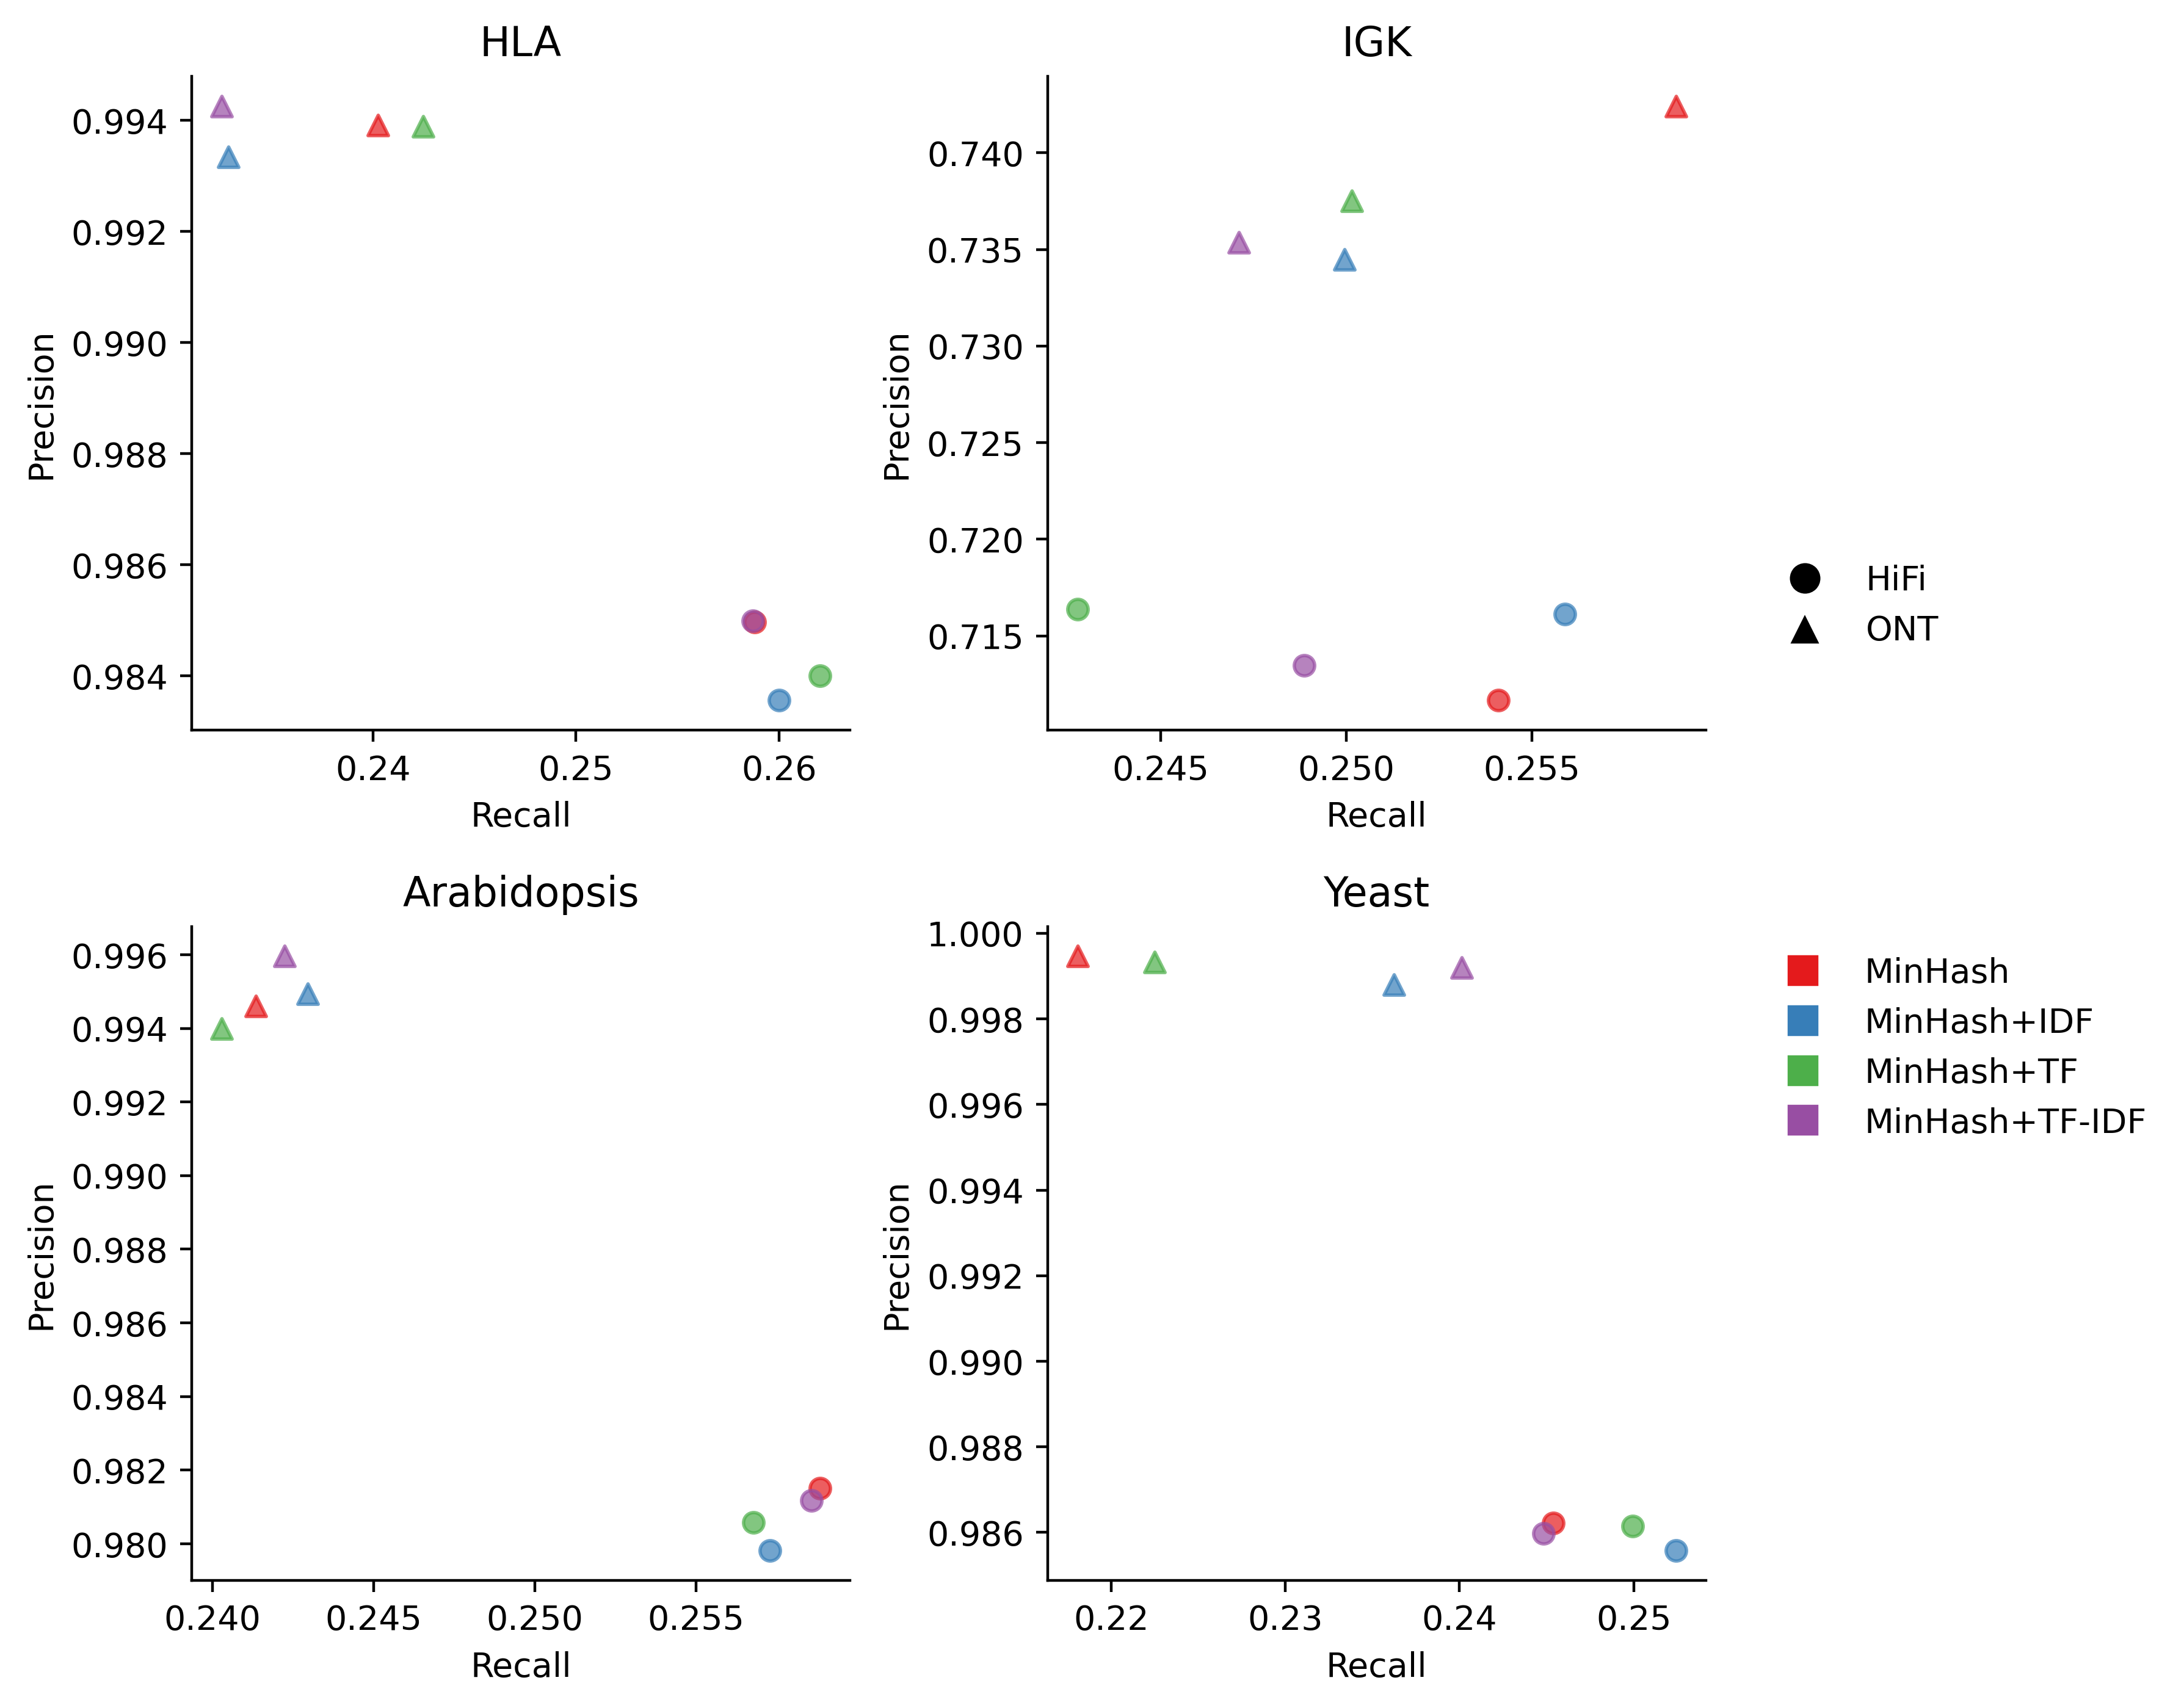

In [91]:
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(8,8))
fig.subplots_adjust(wspace=0.3)
regions = ['HLA','IGK','Arabidopsis','Yeast']
shape_list = ['o','^']
for num,ax in enumerate([ax1,ax2,ax3,ax4]):
    y = precision[num*8:num*8+8]
    x = recall[num*8:num*8+8]
    category_color = colors[:4]+colors[:4]
    category_shape = ['o']*4+['^']*4
    for i in range(0,8):
        ax.scatter(x[i], y[i], color=category_color[i], marker= category_shape[i],alpha=0.7)
    
    ax.set_title(regions[num])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.set_ylabel('Precision')
    ax.set_xlabel('Recall')
plt.subplots_adjust(hspace=0.3)
# ax1.set_ylim(0.69,1.05)
# ax3.set_ylim(0.9309,1.005)

symbol_handles = [plt.Line2D([0], [0], marker=shape_list[i], color='w', markerfacecolor='black', markersize=10) 
                  for i in range(0,2)]
symbol_labels = ['HiFi','ONT']
shape_legend = ax.legend(handles=symbol_handles, labels=symbol_labels, loc='upper right',frameon=False,bbox_to_anchor=(1.4,1.6))
ax.add_artist(shape_legend)
color_handles = [plt.Line2D([0], [0], marker='s', color='w', markerfacecolor=colors[i], markersize=10)
                 for i in range(0,4)]
color_labels = ['MinHash','MinHash+IDF','MinHash+TF','MinHash+TF-IDF'] 
ax.legend(handles=color_handles, labels=color_labels, loc='upper left',frameon=False,bbox_to_anchor=(1.05, 1))
# 将颜色图例添加到图中


plt.show()


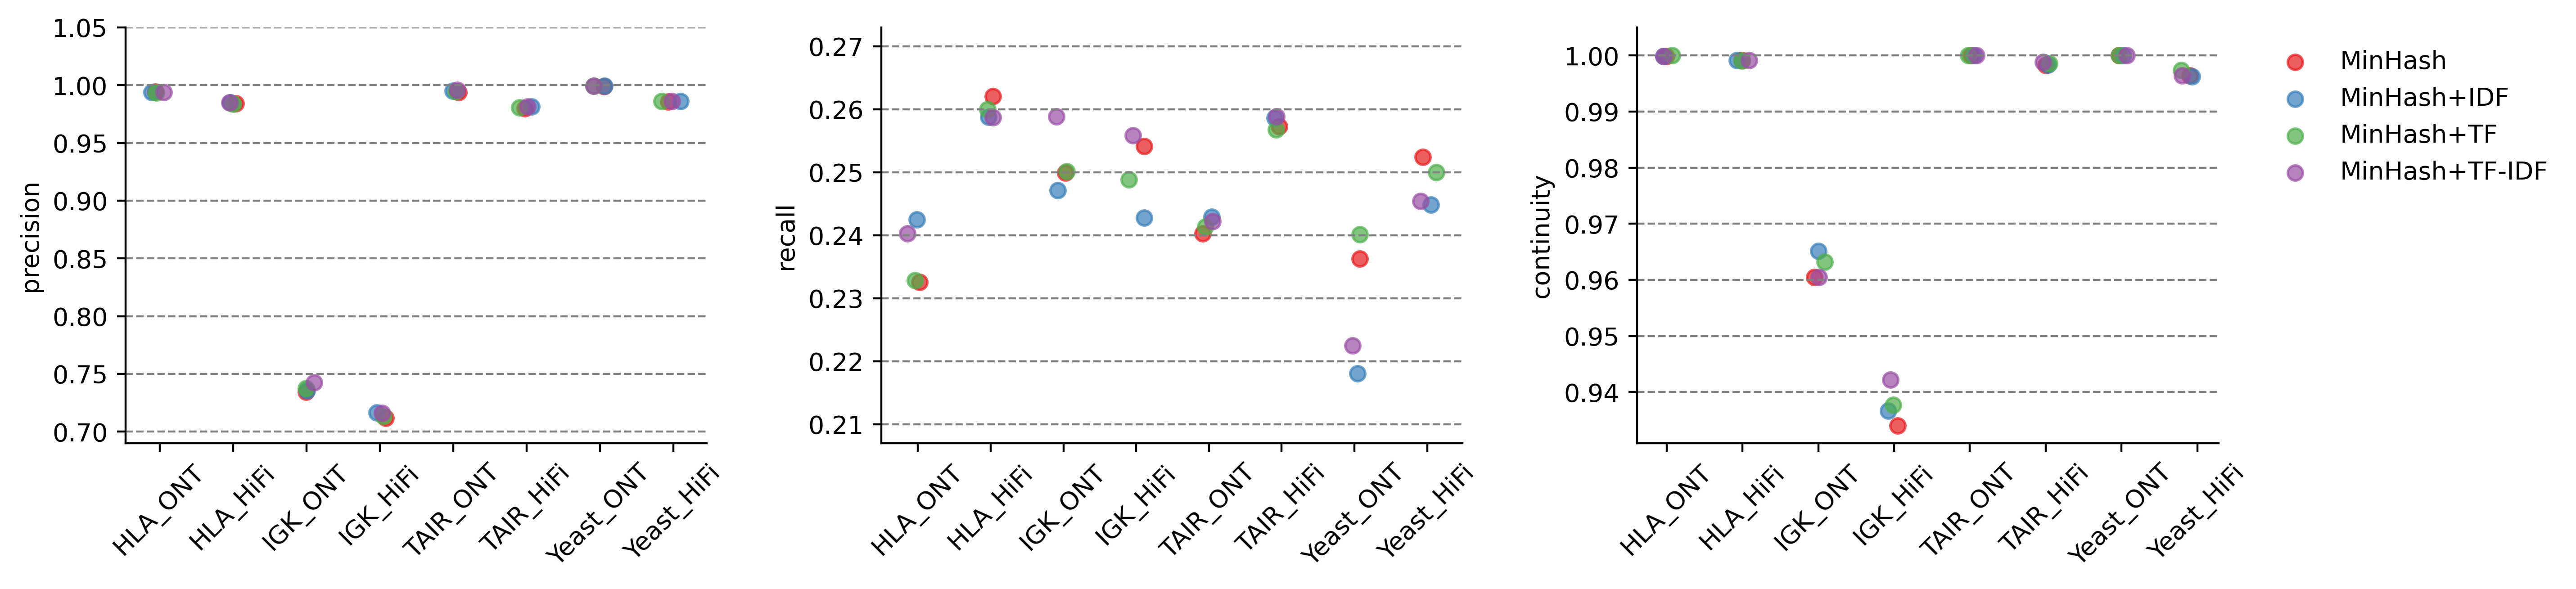

In [ ]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots(2,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(weighted):
        method_values = values[num][i*8:(i+1)*8]
        x = rand_jitter([1,2,3,4,5,6,7,8])
        ax.scatter(x, method_values, color=colors[i], label=method,alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4,5,6,7,8],labels = samples)
    ax.set_xticklabels(samples, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

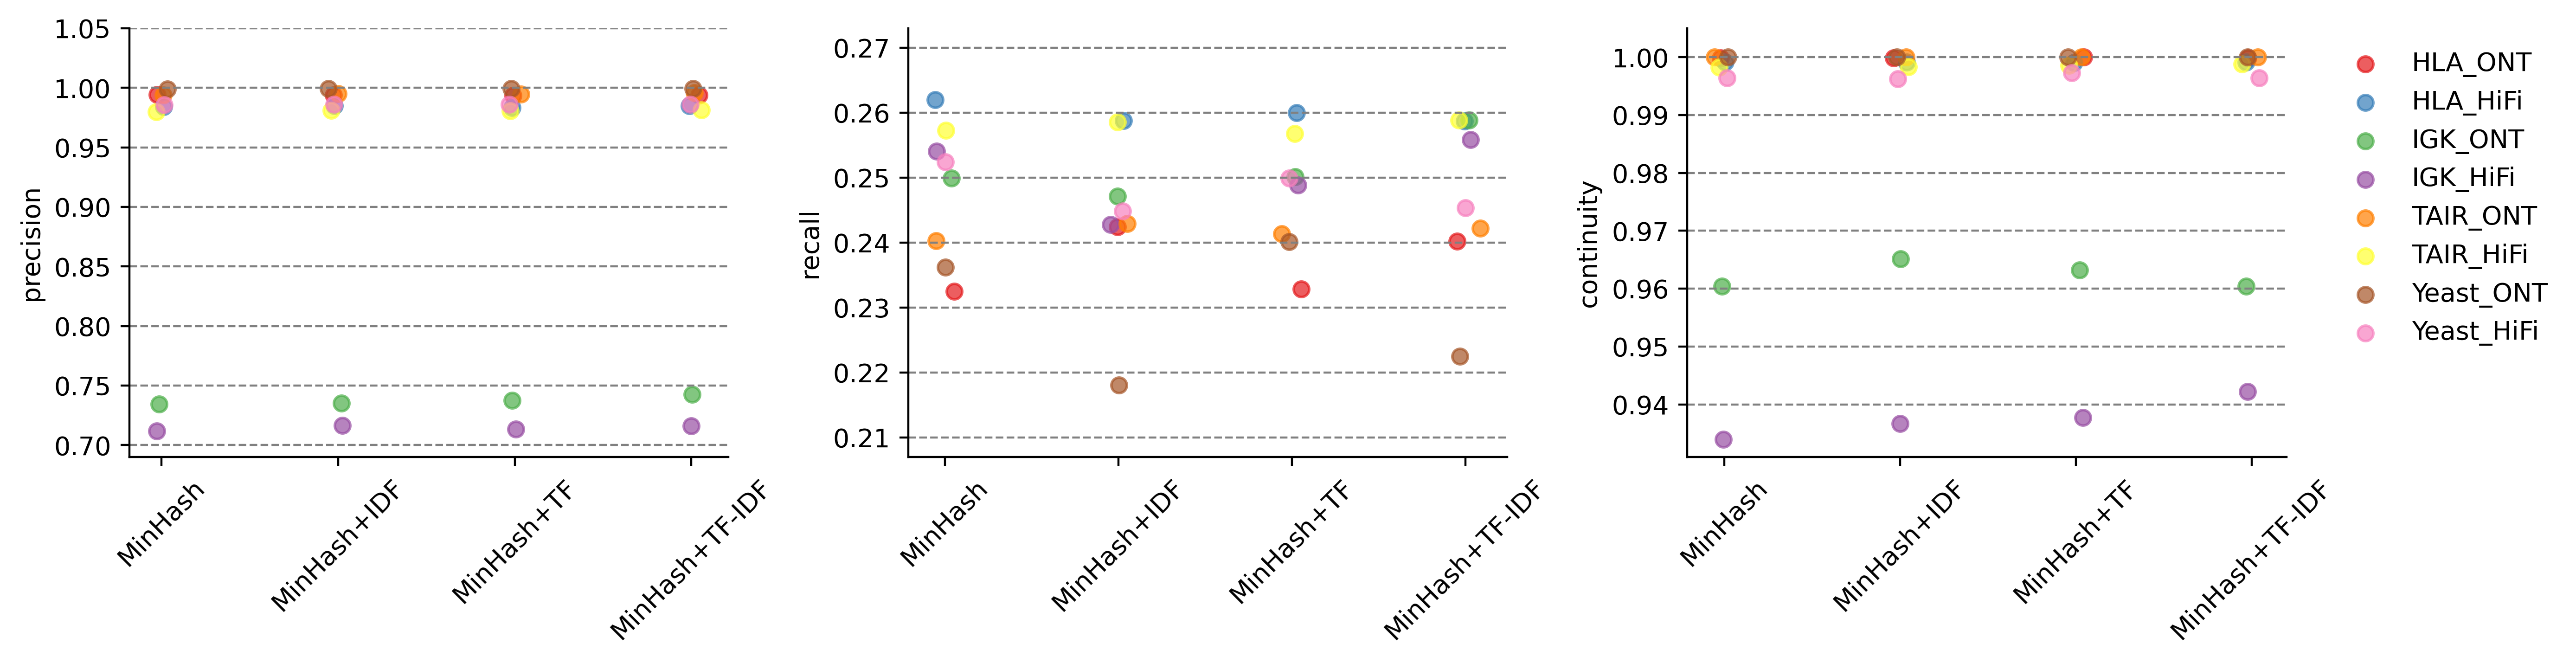

In [148]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(samples):
        ind = [i,i+8,i+16,i+24]
        method_values =  [values[num][x] for x in ind]
        x = rand_jitter([1,2,3,4])
        ax.scatter(x, method_values, color=colors[i], label=samples[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = weighted)
    ax.set_xticklabels(weighted, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

AttributeError: 'numpy.ndarray' object has no attribute 'scatter'

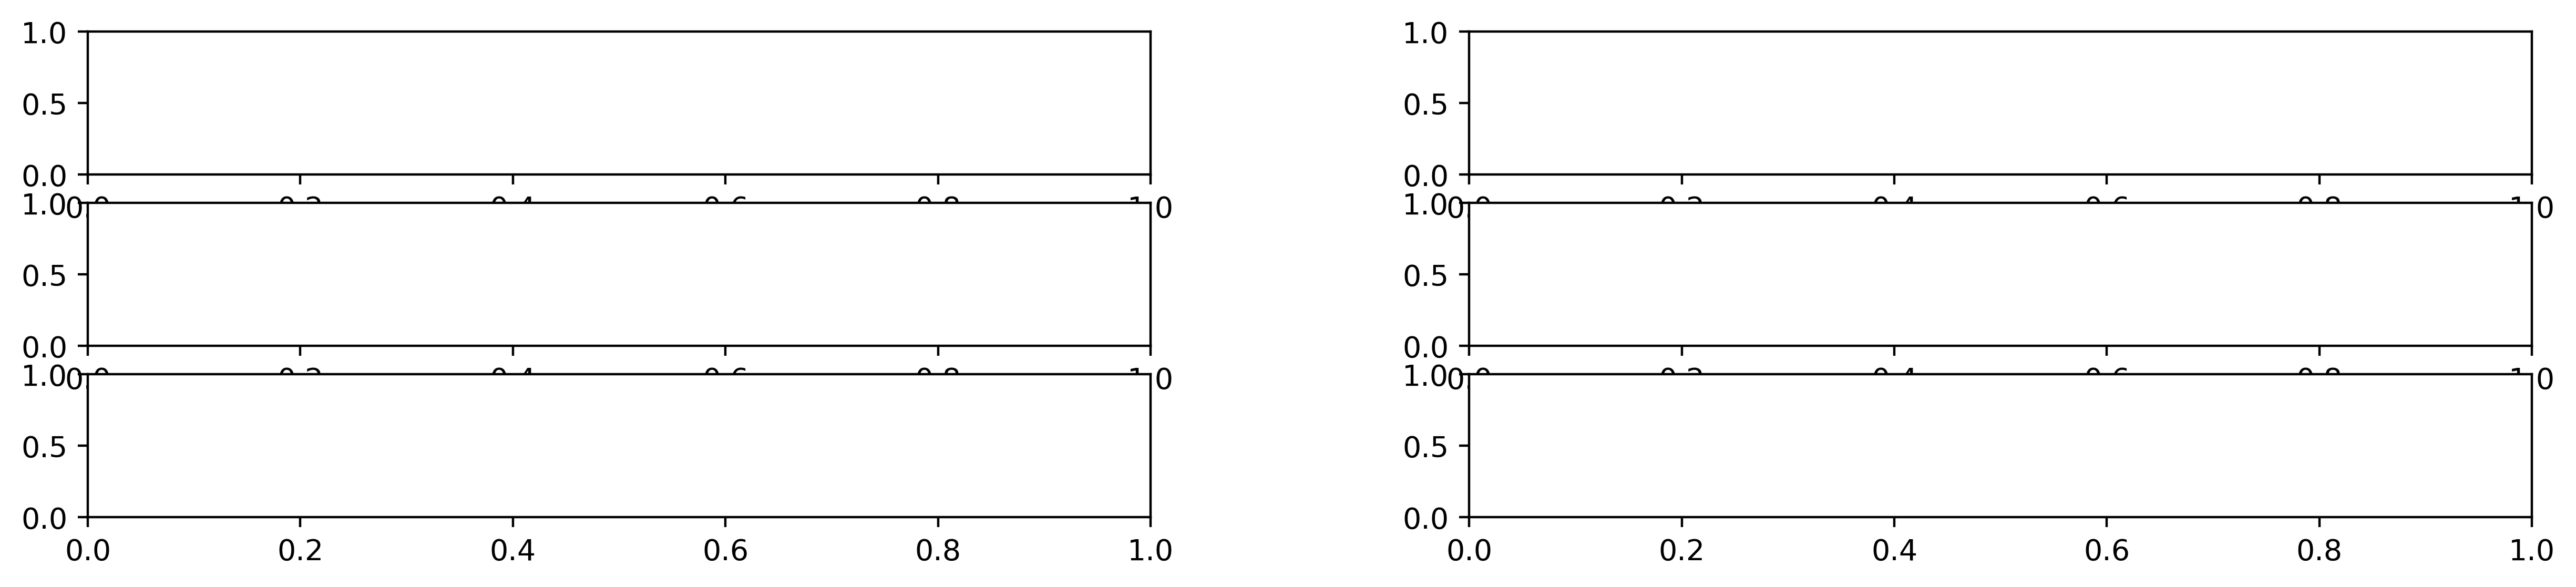

In [149]:
samples=['HLA_ONT','HLA_HiFi','IGK_ONT','IGK_HiFi','TAIR_ONT','TAIR_HiFi','Yeast_ONT','Yeast_HiFi']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(3,2,figsize=(15,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, method in enumerate(samples):
        ind = [i,i+8,i+16,i+24]
        method_values =  [values[num][x] for x in ind]
        x = rand_jitter([1,2,3,4])
        ax.scatter(x, method_values, color=colors[i], label=samples[i],alpha=0.7)
    # ax.spines['left'].set_visible(False)
    ax.set_xticks(ticks = [1,2,3,4],labels = weighted)
    ax.set_xticklabels(weighted, rotation=45)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])

ax1.set_ylim(0.69,1.05)
ax3.set_ylim(0.9309,1.005)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)

In [55]:
i=0
range(i*8,(i+1)*8)

range(0, 8)

In [ ]:
samples=['TAIR_6','TAIR_12','yeast_6','yeast_12']
colors = sns.color_palette(palette='Set1')
plt.rcParams['figure.dpi'] = 400
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(12,3))
fig.subplots_adjust(wspace=0.3)
values = [precision,recall,continuity]
ylabel = ['precision','recall','continuity']

for num,ax in enumerate([ax1,ax2,ax3]):
    for i, sample in enumerate(samples):
        method_values = values[num][i*4:i*4+4]
        ax.scatter(weighted, method_values, color=colors[i],label=sample,alpha=0.5)
    ax.set_xticks(weighted, weighted, rotation=70)
    # ax.spines['left'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    yticks = ax.get_yticks()
    for y in yticks:
        ax.axhline(y=y, linestyle='--', color='gray', linewidth=0.8)
    ax.set_ylabel(ylabel[num])
ax3.set_ylim(0,1.05)
ax3.legend(bbox_to_anchor=(1.05, 1), loc='upper left',frameon=False)